In [1]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP7 : PRIMALITE DES ENTIERS                                                 #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

n = 561

# Code pour l'EXERCICE

def testRM(n):
    return ZZ(n).is_prime() # A MODIFIER

# # Affichage des resultats

print "Test de la primalite de n=",n,"avec implementation de Rabin-Miller"
print testRM(n)

print("""\
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

nmin=10
nmax=500
nbtests = 1

# Code pour l'EXERCICE

rep2 = "A compléter - réponse à la Q2"
rep3 = "A compléter - réponse à la Q3"

# # Affichage des resultats

bar_chart( [sum( [testRM(n) for i in range(nbtests)]) for n in range(nmin,nmax)])
print(rep2)
print(rep3)
list_plot( [timeit( 'testRM(n)', number=20, repeat=3, seconds=true) for n in range(1001,1001+100000,100) ])


reset()
print("""\
# ****************************************************************************
# TEST DE SOLOVAY-STRASSEN 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

n = 561

# Code pour l'EXERCICE

def testRM(n):
    return ZZ(n).is_prime() # A MODIFIER

rep3 = "A compléter - réponse à la Q3"
rep4 = "A compléter - réponse à la Q4"

# # Affichage des resultats

print "Test de la primalite de n=",n,"avec implementation de Solovay-Strassen"
print testRM(n)
print(rep3)
print(rep4)


reset()
print("""\
# ****************************************************************************
# COMPARAISON ENTRE LES TESTS DE R-M ET S-S 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

nmax=150

# Code pour l'EXERCICE

Temoins = []

# # Affichage des resultats

print "Liste d'entiers composés et de temoins exclusifs de Rabin-Miller"
print Temoins



reset()
print("""\
# ****************************************************************************
# TEST DE LUCAS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


# Code pour l'EXERCICE

def testL(n):
    return ZZ(n).is_prime() # A MODIFIER

# # Affichage des resultats

for _ in range(1):
    n =  ZZ.random_element(2,3)
    print n.is_prime()==testL(n)



reset()
print("""\
# ****************************************************************************
# TEST DE BAILLIE, POMERANCE, SELFRIDGE ET WAGSTAFF
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

nmax=1000

# Code pour l'EXERCICE

def testBPSW(n):
    return ZZ(n).is_prime() # A MODIFIER

# # Affichage des resultats

print all([ZZ(n).is_prime()==testBPSW(n) for n in range(2,nmax+1)])


# *************************************************************************** #
# *************************************************************************** #
# TP7 : PRIMALITE DES ENTIERS                                                 #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************

Test de la primalite de n= 561 avec implementation de Rabin-Miller
False
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************

A compléter - réponse à la Q2
A compléter - réponse à la Q3
# ****************************************************************************
# TEST DE SOL

# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************

Test de la primalite de n= 561 avec implementation de Rabin-Miller
False
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************

A compléter - réponse à la Q2
A compléter - réponse à la Q3


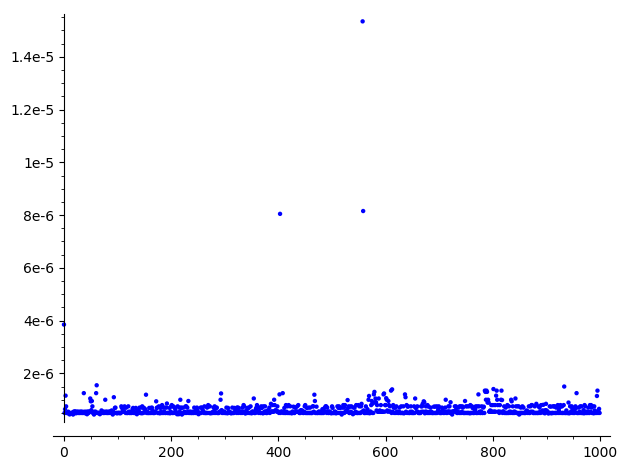

In [1]:
reset()
print("""\
# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

n = 561

# Code pour l'EXERCICE

def testRM(n):
    return ZZ(n).is_prime() # A MODIFIER

# # Affichage des resultats

print "Test de la primalite de n=",n,"avec implementation de Rabin-Miller"
print testRM(n)

print("""\
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

nmin=10
nmax=500
nbtests = 1

# Code pour l'EXERCICE

rep2 = "A compléter - réponse à la Q2"
rep3 = "A compléter - réponse à la Q3"

# # Affichage des resultats

bar_chart( [sum( [testRM(n) for i in range(nbtests)]) for n in range(nmin,nmax)])
print(rep2)
print(rep3)
list_plot( [timeit( 'testRM(n)', number=20, repeat=3, seconds=true) for n in range(1001,1001+100000,100) ])


In [34]:
reset()

import math

print("""\
# ****************************************************************************
# Crible d'Erastosthène
# ****************************************************************************
""")


# For making a list of prime smaller or equal than an integer B
def eratosthene(B):
    T = [b+2 for b in range(B-1)]

    d = 1
    j = 0
    while ( d <= sqrt(B) or j < len(T)):
        d = T[j]

        # get all multiples of d up to B
        mults = [(i)*d for i in range(2,B/d)]
        for i in mults:
            try:
                T.remove(i)
            except:
                if i > B:
                    break
                # already exceeded
        j += 1
    return T

B = 832
print(eratosthene(B))

# ****************************************************************************
# Crible d'Erastosthène
# ****************************************************************************

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 817, 821, 823, 827, 829, 831, 832]


In [32]:
ppp = [1,2,3,4]

ppp.remove(1)

In [33]:
ppp

[2, 3, 4]